<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Customer_Churn_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict if customers will be likely to churn.  

In [ ]:
# Import the software libraries.
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

The data set for this project can be found on Kaggle at this location:
https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

In [ ]:
# Load the data into Google Colab. 
from google.colab import files  
uploaded = files.upload() 

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv.csv


In [ ]:
# Store the data into a data frame.
customers = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv.csv')

In [ ]:
# Data analysis and exploration. 
# Print the first 5 rows
customers.head(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Show the number of rows and columns in the data frame. 
customers.shape

(7043, 21)

Definitions for the data variables are shown below. There are 7,043 customer  records with 20 features and 1 target variable. 

*   Customer ID: Customer identification number.
*   Gender: Sex of customer (Male or Female).
*   Senior Citizen: Customer a senior citizen or not (0, 1).
*   Partner: Customer has a partner or not (Yes, No).
*   Dependents: Customer has dependents or not (Yes, No).
*   Tenure: Number of months the customer has stayed with the company.
*   Phone Service: Customer has a phone service or not (Yes, No).
*   Multiple Lines: Customer has multiple lines (Yes, No, No phone service)
*   Internet Service: Customer internet service provider (DSL, Fiber optic, No)
*   Online Security: Customer has online security (Yes, No, No internet service)
*   Online Backup: Customer has online backup (Yes, No).
*   Device Protection: Customer has deviceprotection (Yes, No).
*   Tech Support: Customer has technical suppoort: (Yes, No).
*   Streaming Movies: Customer has streaming movies: (Yes, No).
*   Contract: Contract term.
*   Paperless Billing: Customer has paperless billing.
*   Payment Method: How payments are made.
*   Monthly Charges: Monthly payment amount.
*   Total Charges: Total payment amount.
*   Churn: Customer churn (no = retained, yes = churned) 

In [ ]:
# View statistical details. 
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The statistics show that the longest tenure is 72 months, and the maximum monthly charge is  $118.75. 

The minimum monthly charge is $18.25.

The customer can expect to have an average monthly charge of $64.76. I am assuming the charges are in United States Dollars (USD).

In [ ]:
# Show information about the dataframe.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for NA or missing data.
customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Show the number of customers retained and the number of customers churned.
customers['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

5,174 customers were retained and 1,869 customers churned.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


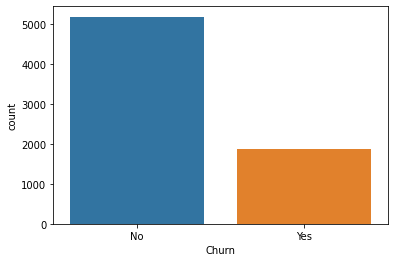

In [ ]:
# Visualize the counts for customers retained and customers churned. 
sns.countplot(customers['Churn'])

In [ ]:
# Show percentages for customers staying and customers leaving.
retained = customers[customers.Churn == 'No']
churned = customers[customers.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]

# Print the percentage of customers that stayed with the company 
print(num_retained / (num_retained + num_churned) * 100 , "% of customers that stayed with the company.")

# Print the percentage of customers that left the company
print(num_churned / (num_retained + num_churned) * 100,"% of customers that left the company.")

73.4630129206304 % of customers that stayed with the company.
26.536987079369588 % of customers that left the company.


We find that 73.46% of the customers were retained (stayed with the company) and 26.54% of the customers churned (left the company).

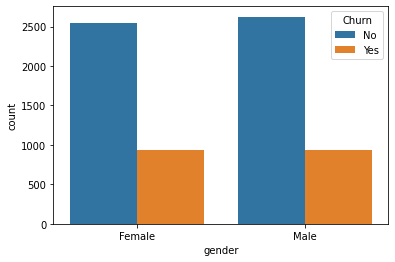

In [ ]:
# Visualize the churn count for males and females.
sns.countplot(x='gender', hue='Churn', data = customers)

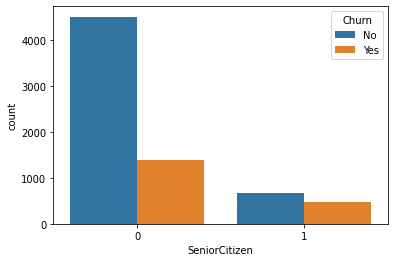

In [ ]:
# Visualize the churn count for senior citizens.
sns.countplot(x='SeniorCitizen', hue='Churn', data = customers)

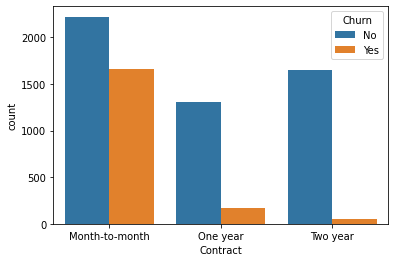

In [ ]:
# Visualize the churn count for contract type.
sns.countplot(x='Contract', hue='Churn',data = customers)

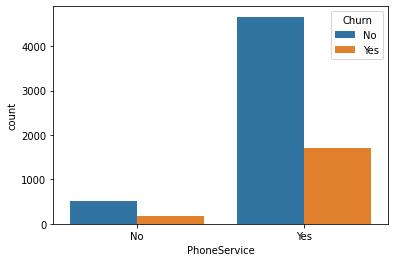

In [ ]:
# Visualize the churn count for phone service.
sns.countplot(x='PhoneService', hue='Churn',data = customers)

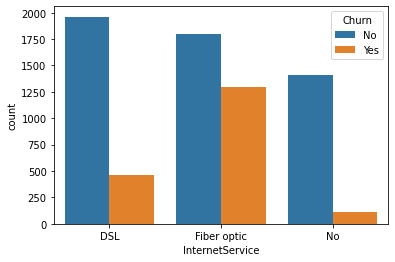

In [ ]:
# Visualize the churn count for the type of internet service.
sns.countplot(x='InternetService', hue='Churn', data = customers)

Summary of findings include the following:

*   73.46% of the customers were retained and 26.54% of the customers churned. 
*   Gender does not appear to play a role in customer churn.
*   Most of the customers are young and not senior citizens.
*   Customers with month-to month contracts are more likely to churn than customers with one year or two year contracts.
*   Most customers have a phone service.
*   Customers with fiber optic internet service are more likely to churn than   customers with DSL or no internet service.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3893de7ed0>,
      dtype=object)

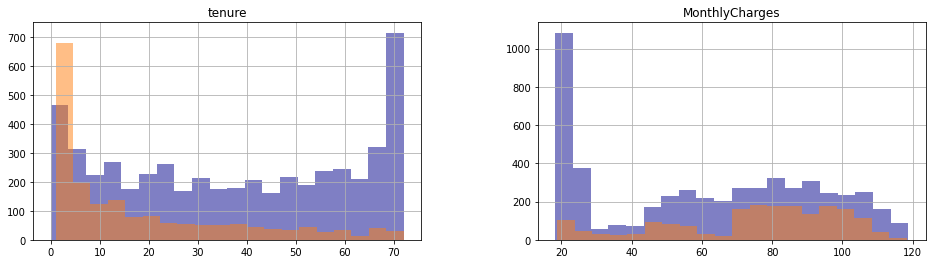

In [ ]:
# Visualize the tenure and monthly charge features to see if there are any differences for customer churn.
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
customers[customers.Churn == 'No'][numerical_features].hist(bins=20, color="darkblue", alpha=0.5, ax=ax)
customers[customers.Churn == 'Yes'][numerical_features].hist(bins=20, color="tab:orange", alpha=0.5, ax=ax)

The tenure chart (on the left) shows that most of the customers that churned had between 1 and 9 months with the company, while most of the retained customers had a tenure between 22 and 72 months. So, it may be in the companies best interest to try everything they can to keep their customers for at least 2 years.

The monthly charges chart (on the right) shows that most of the loyal customers that stayed with the company had a monthly charge between 18 and 30 dollars. Most of the customers that churned had a monthly charge of 70 to 110 dollars. Maybe the company should lower the monthly charges to retain customers.

In [ ]:
# Data Processing and Cleaning
# Remove the following features because they add little value to the model. Having unnecassary features increases the model complexity. 
# It is better to have a simpler model whenever possible.
cols = ['customerID', 'gender', 'PhoneService', 'Contract', 'TotalCharges']
customers = customers.drop(columns = cols, axis = 1)

In [ ]:
# Convert all the non-numeric columns to numerical data types.
for column in customers.columns:
   if customers[column].dtype == np.number:
      continue
   customers[column] = LabelEncoder().fit_transform(customers[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# View the updated data set. 
customers.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,0
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,1
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,0
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,1


In [ ]:
# Split the data into training and test data sets.
# First we need to divide our data into x values (the data we will use to make predictions) 
# and y values (the data we are attempting to predict).

x_data = customers.drop('Churn', axis = 1) 
y_data = customers['Churn']

# Scale the x data to be values between 0 and 1 inclusively. 
x_data = StandardScaler().fit_transform(x_data)

In [ ]:
# Use train_test_split function to generate training data and test data. Test data set is 30% of original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3, random_state=42)

**Logistic Regression Model**

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_lg = LogisticRegression()

In [ ]:
# Train the model using the fit method and training data. 
model_lg.fit(x_training_data, y_training_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions on the test data. 
predictions_lr = model_lg.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
lg = accuracy_score(y_test_data, predictions_lr)
print(lg)

0.8088026502602934


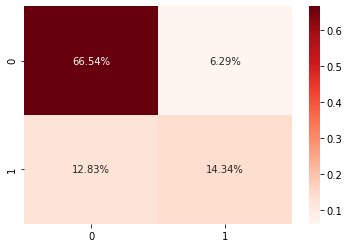

In [ ]:
# Show Confusion Maxtrix.
cm1 = confusion_matrix(y_test_data, predictions_lr)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

The logistic regression model correctly predicted 80.88% of the customers to be retained or to churn.

*   66.54% correctly predicted customers to be retained.
*   14.34% correctly predicted customers to churn.

19.12% of the customers were incorrectly predicted to be retained or to churn.

*   6.29% incorrectly predicted customers to churn.
*   12.83% incorrectly predicted customers to be retained.

**Decision Tree Model**

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

In [ ]:
# Train the Model using the fit method and training data. 
model_dt.fit(x_training_data, y_training_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Make predictions on the test data. 
predictions_dt = model_dt.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
dt = accuracy_score(y_test_data, predictions_dt)
print(dt)

0.7283483199242783


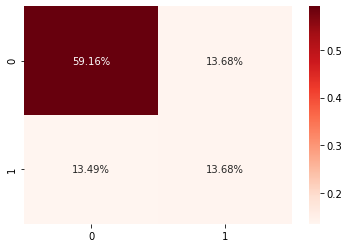

In [ ]:
# Show Confusion Maxtrix
cm2 = confusion_matrix(y_test_data, predictions_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

The decision tree model correctly predicted 72.84% of the customers to be retained or to churn.

*   59.16% correctly predicted customers to be retained.
*   13.68% correctly predicted customers to churn.

27.17% of the customers were incorrectly predicted to be retained or to churn.

*   13.68% incorrectly predicted customers to churn.
*   13.49% incorrectly predicted customers to be retained.

**Random Forrest Model**

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
# model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10)

Parameters are:


*   n_estimators is the number of trees in the forest
*   max_depth is the maximum depth of the tree

In [ ]:
# Train the model using the fit method and training data.
model_rf.fit(x_training_data, y_training_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.7998106956933271


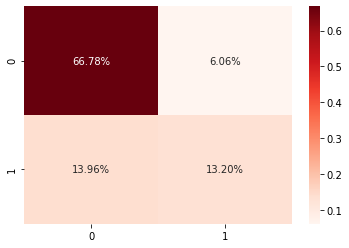

In [ ]:
# Show Confusion Maxtrix
cm3 = confusion_matrix(y_test_data, predictions_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

The random forrest model correctly predicted 79.98% of the customers to be retained or to churn.

*   66.78% correctly predicted customers to be retained.
*   13.20% correctly predicted customers to churn.

20.02% of the customers were incorrectly predicted to be retained or to churn.

*   6.06% incorrectly predicted customers to churn.
*   13.96% incorrectly predicted customers to be retained.

**K Nearest Neighbors**

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
# Train the model using the fit method and training data.
model_kn.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.7662091812588736


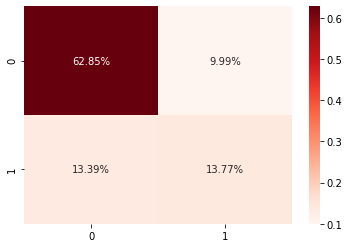

In [ ]:
# Show Confusion Maxtrix
cm4 = confusion_matrix(y_test_data, predictions_kn)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

The K Nearest Neighbors model correctly predicted 76.62% of the customers to be 
retained or to churn.

*   62.85% correctly predicted customers to be retained.
*   13.77% correctly predicted customers to churn.

23.38% of the customers were incorrectly predicted to be retained or to churn.

*   9.99% incorrectly predicted customers to churn.
*   13.39% incorrectly predicted customers to be retained.

,Model,Accuracy_score
0,Logistic Regression,0.808803
2,Random Forest,0.799811
3,KNeighbours,0.766209
1,Decision Tree,0.728348


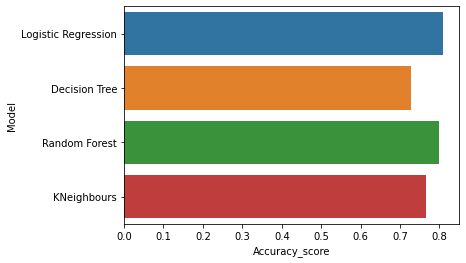

In [ ]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours'],
    'Accuracy_score' :[lg, dt, rf, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusions: The logical regression model had the highest accuracy score. This model correctly predicted 81% of the customers to be retained or to churn and 19% of the customers were incorrectly predicted to be retained or to churn.  


Most of the customers that churned had between 1 and 9 months with the company, while most of the retained customers had a tenure between 22 and 72 months. The company may consider providing incentives to customers in order to retain them for at least 2 years.


Most of the customers that stayed with the company had a monthly charge between 18 and 30 dollars while most of the customers that churned had a monthly charge between 70 to 110 dollars. The company may consider lowering their monthly charges in order to retain customers and be more competitive.